# Loan Application Status Prediction

Problem Statement:
This dataset includes details of applicants who have applied for loan. The dataset includes details like credit history, loan amount, their income, dependents etc. 

Independent Variables:

- Loan_ID

- Gender

- Married

- Dependents

- Education

- Self_Employed

- ApplicantIncome

- CoapplicantIncome

- Loan_Amount

- Loan_Amount_Term

- Credit History

- Property_Area

Dependent Variable (Target Variable):

- Loan_Status

In [119]:
import numpy as np
import pandas as pd
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler

from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import train_test_split

from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

import warnings
warnings.filterwarnings('ignore')

# Importing the dataset

In [2]:
df1=pd.read_csv("loan_prediction.csv")
df1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


# Exploratory Data Analysis

In [3]:
df1.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
df1.sample()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
204,LP001691,Male,Yes,2,Not Graduate,No,3917,0.0,124.0,360.0,1.0,Semiurban,Y


In [5]:
df1.tail()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y
613,LP002990,Female,No,0,Graduate,Yes,4583,0.0,133.0,360.0,0.0,Semiurban,N


In [6]:
df1.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


# Checking Null Values

In [8]:
df1.isnull()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,False,False,False,False,False,False,False,False,True,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,False,False,False,False,False,False,False,False,False,False,False,False,False
610,False,False,False,False,False,False,False,False,False,False,False,False,False
611,False,False,False,False,False,False,False,False,False,False,False,False,False
612,False,False,False,False,False,False,False,False,False,False,False,False,False


In [9]:
df1.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [23]:
print(df1['Gender'].mode())

0    Male
Name: Gender, dtype: object


In [24]:
df1['Gender'].fillna(df1['Gender'].mode()[0], inplace=True)

In [25]:
df1['Dependents'].fillna(df1['Dependents'].mode()[0], inplace=True)

In [26]:
df1['Self_Employed'].fillna(df1['Self_Employed'].mode()[0], inplace=True)

In [27]:
df1['LoanAmount'].fillna(df1['LoanAmount'].mean(), inplace=True)

In [28]:
df1['Loan_Amount_Term'].fillna(df1['Loan_Amount_Term'].mean(), inplace=True)

In [29]:
df1['Credit_History'].fillna(df1['Credit_History'].mode()[0], inplace=True)

In [30]:
df1.isnull().sum()

Loan_ID              0
Gender               0
Married              3
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [31]:
df1['Married'].fillna(df1['Married'].mode()[0], inplace=True)

In [32]:
df1.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [33]:
df1.isnull().sum().sum()

0

<AxesSubplot:>

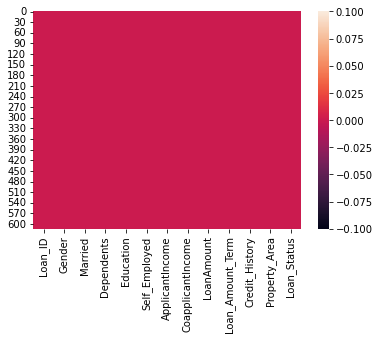

In [34]:
sns.heatmap(df1.isnull())

There is no Null values present in the dataset now.

# Summary Statistics

In [38]:
df1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [39]:
df1.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,614.000000,614.000000,614.000000
mean,5403.459283,1621.245798,146.412162,342.000000,0.855049
std,6109.041673,2926.248369,84.037468,64.372489,0.352339
min,150.000000,0.000000,9.000000,12.000000,0.000000
25%,2877.500000,0.000000,100.250000,360.000000,1.000000
50%,3812.500000,1188.500000,129.000000,360.000000,1.000000
75%,5795.000000,2297.250000,164.750000,360.000000,1.000000
max,81000.000000,41667.000000,700.000000,480.000000,1.000000


Mean is greater than median in ApplicantIncome, CoApplicantIncome, LoanAmount.

max value is greater than 75th percentile in ApplicantIncome, CoapplicantIncome, LoanAmount, Loan_Amount_Term.

# Univariate Analysis

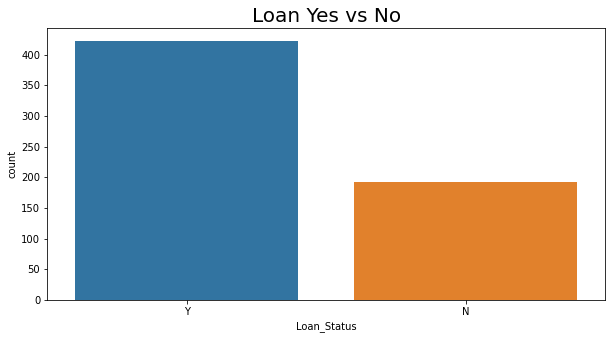

In [41]:
plt.figure(figsize = (10,5))
sns.countplot(x="Loan_Status", data=df1)
plt.title("Loan Yes vs No", fontsize = 20)
plt.show()

There are 422 Yes(loan Approved) and 192 No(loan Approved) values are present in the dataset.

In [42]:
df1['Dependents'].value_counts()

0     360
1     102
2     101
3+     51
Name: Dependents, dtype: int64

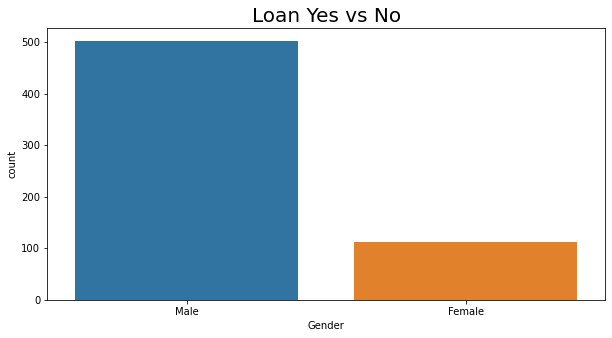

In [43]:
plt.figure(figsize = (10,5))
sns.countplot(x="Gender", data=df1)
plt.title("Loan Yes vs No", fontsize = 20)
plt.show()

When plotting Gender column Male applicants are higher when compared to female applicants for loan.

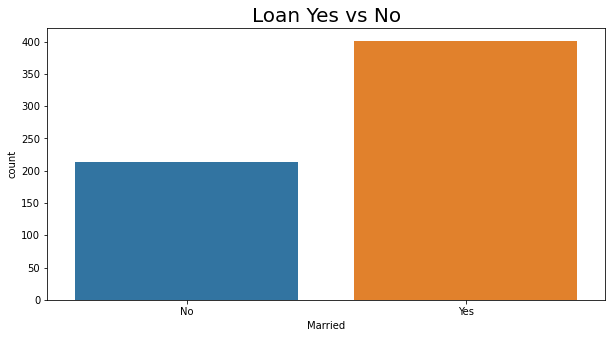

In [44]:
plt.figure(figsize = (10,5))
sns.countplot(x="Married", data=df1)
plt.title("Loan Yes vs No", fontsize = 20)
plt.show()

we can see that married people apply high for loan.

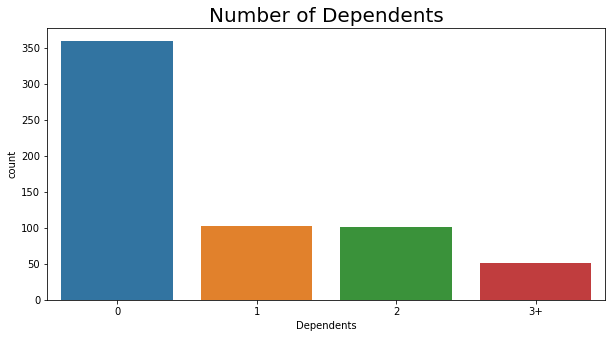

In [45]:
plt.figure(figsize = (10,5))
sns.countplot(x="Dependents", data=df1)
plt.title("Number of Dependents", fontsize = 20)
plt.show()

The person who does not have any Dependent, those person applied for loan most.

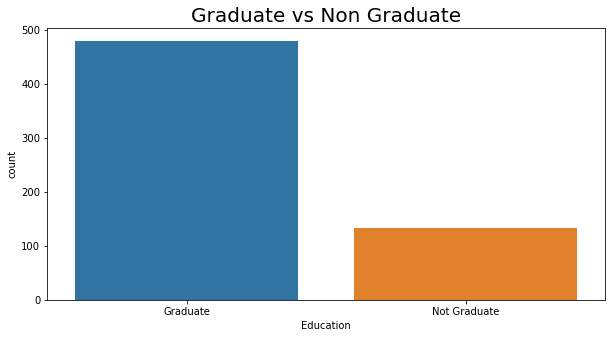

In [46]:
plt.figure(figsize = (10,5))
sns.countplot(x="Education", data=df1)
plt.title("Graduate vs Non Graduate", fontsize = 20)
plt.show()

Graduated People applied for loan most.

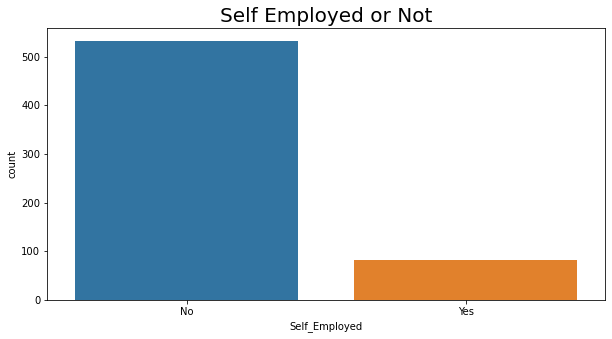

In [47]:
plt.figure(figsize = (10,5))
sns.countplot(x="Self_Employed", data=df1)
plt.title("Self Employed or Not", fontsize = 20)
plt.show()

Those persons who are not self employed, those are applied most for loan.

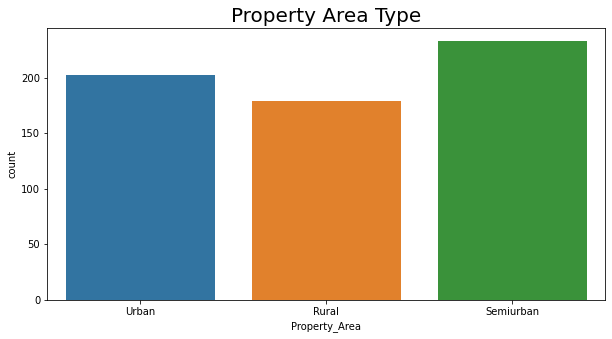

In [48]:
plt.figure(figsize = (10,5))
sns.countplot(x="Property_Area", data=df1)
plt.title("Property Area Type", fontsize = 20)
plt.show()

Mostly semiurban area people applied for loan.

# Bi-variate Analysis

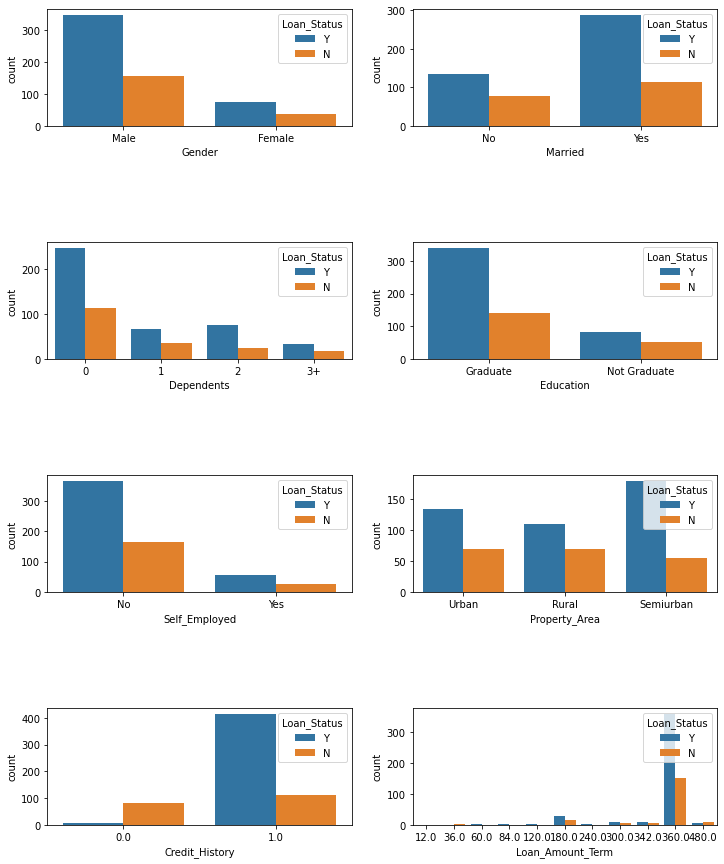

In [50]:
label_list=['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed', 'Property_Area','Credit_History','Loan_Amount_Term']
fig,axes = plt.subplots(4,2,figsize=(12,15))
for i,cat in enumerate(label_list):
    row,col = i//2,i%2  #getting size of plots in row and cols 
    sns.countplot(x=cat,data=df1,hue='Loan_Status',ax=axes[row,col])   #Plotting count plot with hue Loan Status
plt.subplots_adjust(hspace=1)   # Plotting the graphs

In [ ]:
Loan Approval Status: Near 70% of Loan applications got accepted.
    
Sex: Men applied for loan way more than Female and got approved more than female.

Martial Status: 70% of the people are Married, Their loan loans also got approved more.

Dependents: Many number of people have no dependent and their loan also got approved.

Education: More than 80% of the people are Graduate and graduates have higher propotion of loan approval.

Employment: 80% of population is not self employed.

Property Area: Semiurban people have applied for loan more and their loan applications got approved respectively.

Credit History: The person who have credit credit cards those peoples loan is approved more.

Loan Amount Term: The person who took for 360 months i.e. 30 years, those loan approved most.

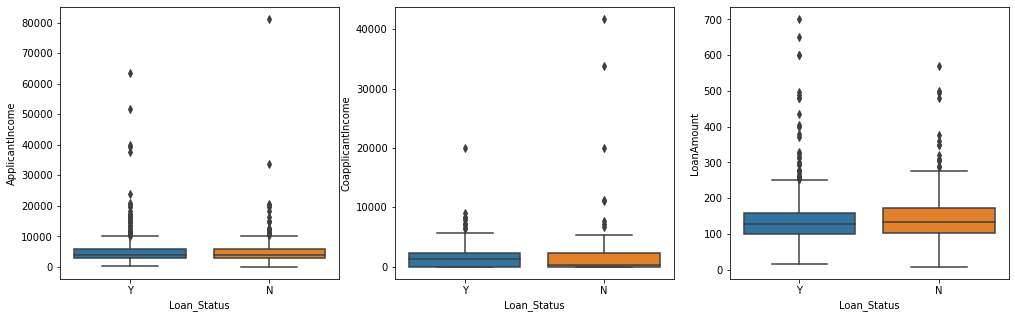

In [51]:
label_list = ['ApplicantIncome', 'CoapplicantIncome', 'LoanAmount']
fig,axes = plt.subplots(1,3,figsize=(17,5)) #size of plot
for i,cat_col in enumerate(label_list):
    sns.boxplot(y=cat_col,data=df1,x='Loan_Status',ax=axes[i])
plt.subplots_adjust(hspace=1) #plotting the graph

In Numerical columns, there is no significant relation with Loan approval status.

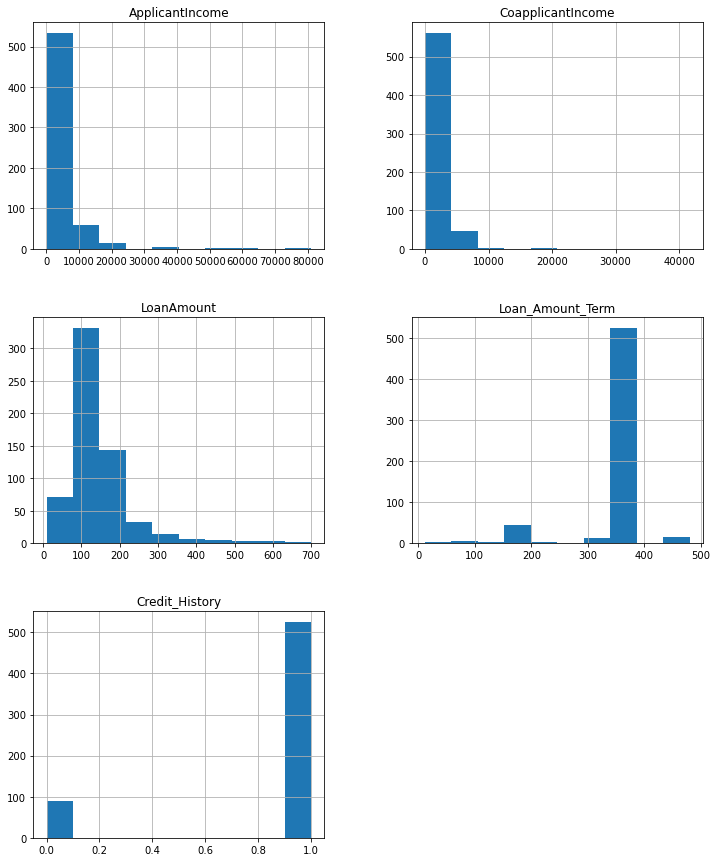

In [52]:
df1.hist(figsize=(12,15))
plt.show()

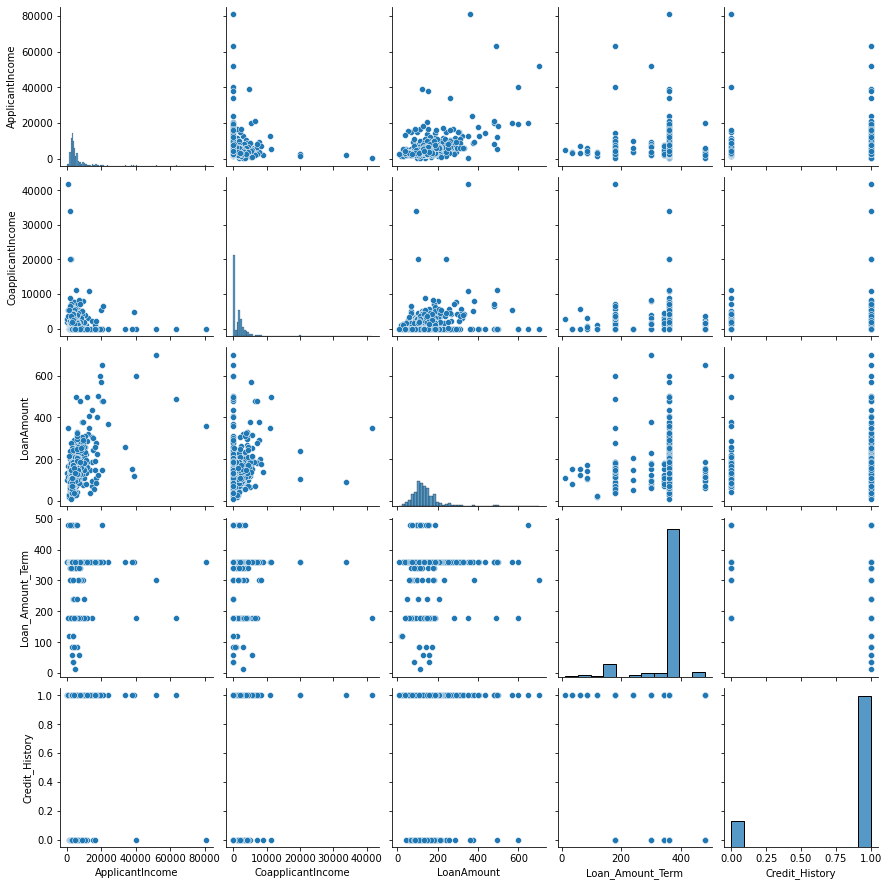

In [53]:
sns.pairplot(df1)

# Encoding

In [54]:
df1.dtypes

Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

We have 8 object type columns including Target variable, 4 float types and only one int type.

we must encode object type columns to numeric types.

Label Encoder

In [55]:
le=LabelEncoder()
df1['Loan_ID']=le.fit_transform(df1['Loan_ID'])
df1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,Male,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,1,Male,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,2,Male,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,3,Male,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,4,Male,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,Female,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,610,Male,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,611,Male,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,612,Male,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [56]:
df1['Gender']=le.fit_transform(df1['Gender'])
df1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,No,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,1,1,Yes,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,2,1,Yes,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,3,1,Yes,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,4,1,No,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,No,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,610,1,Yes,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,611,1,Yes,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,612,1,Yes,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [57]:
df1['Married']=le.fit_transform(df1['Married'])
df1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,1,1,1,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,2,1,1,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,3,1,1,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,4,1,0,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,610,1,1,3+,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,611,1,1,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,612,1,1,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [58]:
df1['Dependents']=le.fit_transform(df1['Dependents'])
df1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,Graduate,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,1,1,1,1,Graduate,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,2,1,1,0,Graduate,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,3,1,1,0,Not Graduate,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,4,1,0,0,Graduate,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,Graduate,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,610,1,1,3,Graduate,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,611,1,1,1,Graduate,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,612,1,1,2,Graduate,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [59]:
df1['Education']=le.fit_transform(df1['Education'])
df1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,No,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,1,1,1,1,0,No,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,2,1,1,0,0,Yes,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,3,1,1,0,1,No,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,4,1,0,0,0,No,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,No,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,610,1,1,3,0,No,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,611,1,1,1,0,No,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,612,1,1,2,0,No,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [60]:
df1['Self_Employed']=le.fit_transform(df1['Self_Employed'])
df1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,Urban,Y
1,1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,Rural,N
2,2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,Urban,Y
3,3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,Urban,Y
4,4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,Rural,Y
610,610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,Rural,Y
611,611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,Urban,Y
612,612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,Urban,Y


In [61]:
df1['Property_Area']=le.fit_transform(df1['Property_Area'])
df1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,Y
1,1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,N
2,2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,Y
3,3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,Y
4,4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,Y
610,610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,Y
611,611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,Y
612,612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,Y


In [62]:
df1['Loan_Status']=le.fit_transform(df1['Loan_Status'])
df1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [64]:
df1.dtypes

Loan_ID                int32
Gender                 int32
Married                int32
Dependents             int32
Education              int32
Self_Employed          int32
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area          int32
Loan_Status            int32
dtype: object

we encoded all categorical values to int type.

# Correlation

In [65]:
df1.corr()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
Loan_ID,1.000000,-0.028029,-0.016013,0.051559,0.039442,0.032874,0.016925,0.039211,0.035684,-0.028945,-0.030603,-0.155416,0.011773
Gender,-0.028029,1.000000,0.364569,0.172914,0.045364,-0.000525,0.058809,0.082912,0.107930,-0.073567,0.009170,-0.025752,0.017987
Married,-0.016013,0.364569,1.000000,0.334216,0.012304,0.004489,0.051708,0.075948,0.147141,-0.100863,0.010938,0.004257,0.091478
Dependents,0.051559,0.172914,0.334216,1.000000,0.055752,0.056798,0.118202,0.030430,0.163106,-0.101054,-0.040160,-0.000244,0.010118
Education,0.039442,0.045364,0.012304,0.055752,1.000000,-0.010383,-0.140760,-0.062290,-0.166998,-0.077242,-0.073658,-0.065243,-0.085884
Self_Employed,0.032874,-0.000525,0.004489,0.056798,-0.010383,1.000000,0.127180,-0.016100,0.115260,-0.033943,-0.001550,-0.030860,-0.003700
ApplicantIncome,0.016925,0.058809,0.051708,0.118202,-0.140760,0.127180,1.000000,-0.116605,0.565620,-0.045242,-0.018615,-0.009500,-0.004710
CoapplicantIncome,0.039211,0.082912,0.075948,0.030430,-0.062290,-0.016100,-0.116605,1.000000,0.187828,-0.059675,0.011134,0.010522,-0.059187
LoanAmount,0.035684,0.107930,0.147141,0.163106,-0.166998,0.115260,0.565620,0.187828,1.000000,0.038801,-0.001431,-0.044776,-0.036416
Loan_Amount_Term,-0.028945,-0.073567,-0.100863,-0.101054,-0.077242,-0.033943,-0.045242,-0.059675,0.038801,1.000000,0.000432,-0.077620,-0.020974


<AxesSubplot:>

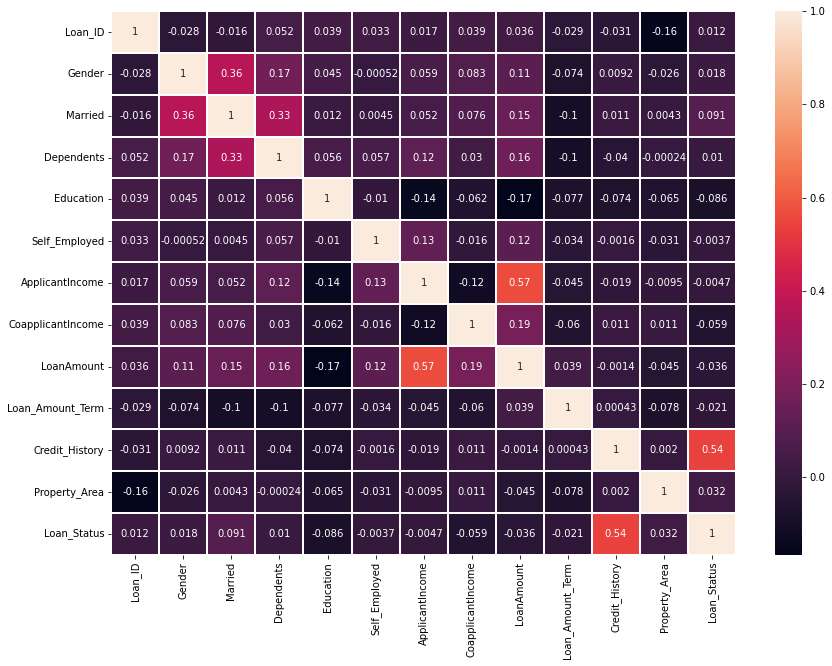

In [66]:
plt.figure(figsize=(14,10))
sns.heatmap(df1.corr(),linewidths=.1,annot=True)

As we see above plot is the correlation of the dataset.

Highly positively correlated with Loan_Status is Credit_History.

Negatively correlated is ApplicantIncome and Education, Loan Amount and Education.

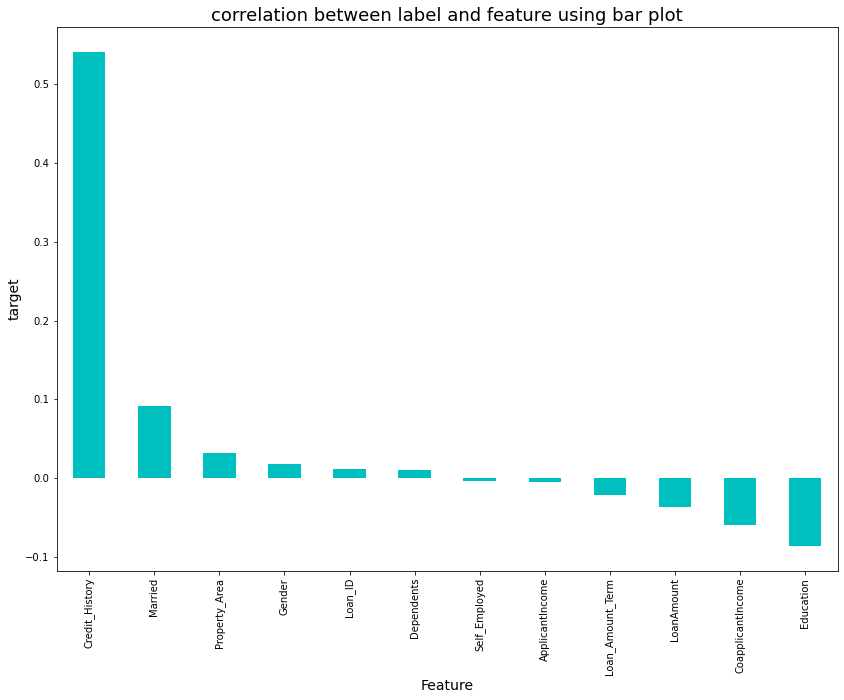

In [67]:
plt.figure(figsize=(14,10))
df1.corr()['Loan_Status'].sort_values(ascending=False).drop(['Loan_Status']).plot(kind='bar',color='c')
plt.xlabel('Feature',fontsize=14)
plt.ylabel('target',fontsize=14)
plt.title('correlation between label and feature using bar plot',fontsize=18)
plt.show()

The above plot shows which independent variables positively and negatively correlated with Target variable.

# Outliers Check

In [68]:
df1.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [69]:
df1.shape

(614, 13)

<AxesSubplot:>

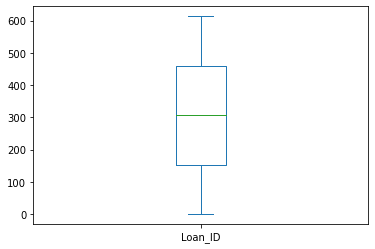

In [71]:
df1['Loan_ID'].plot.box()

<AxesSubplot:>

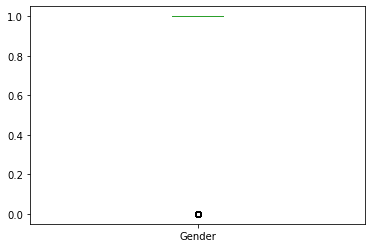

In [72]:
df1['Gender'].plot.box()

<AxesSubplot:>

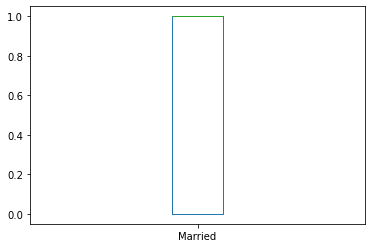

In [73]:
df1['Married'].plot.box()

<AxesSubplot:>

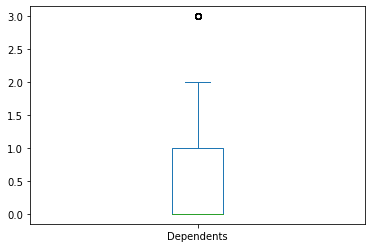

In [74]:
df1['Dependents'].plot.box()

<AxesSubplot:>

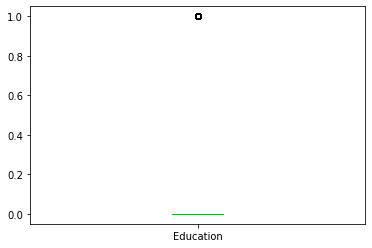

In [75]:
df1['Education'].plot.box()

<AxesSubplot:>

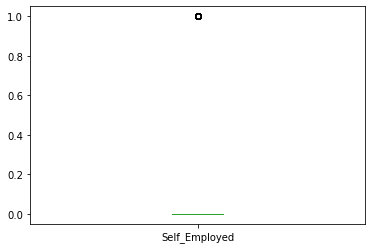

In [76]:
df1['Self_Employed'].plot.box()

<AxesSubplot:>

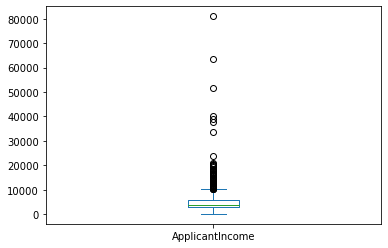

In [77]:
df1['ApplicantIncome'].plot.box()

<AxesSubplot:>

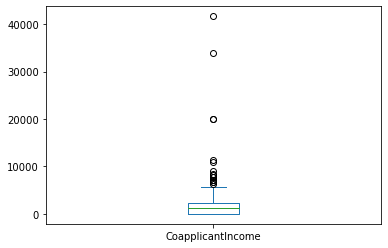

In [79]:
df1['CoapplicantIncome'].plot.box()

<AxesSubplot:>

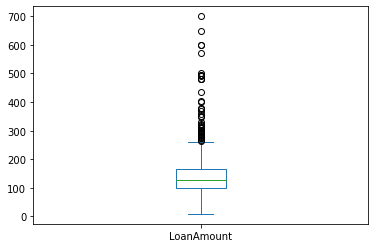

In [80]:
df1['LoanAmount'].plot.box()

<AxesSubplot:>

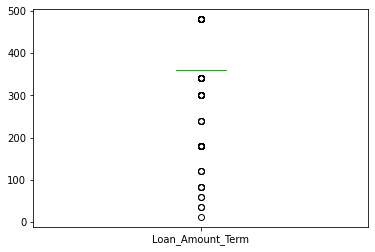

In [81]:
df1['Loan_Amount_Term'].plot.box()

<AxesSubplot:>

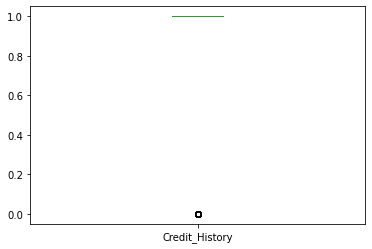

In [82]:
df1['Credit_History'].plot.box()

<AxesSubplot:>

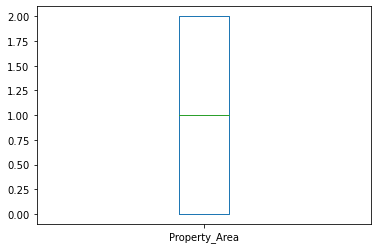

In [83]:
df1['Property_Area'].plot.box()

<AxesSubplot:>

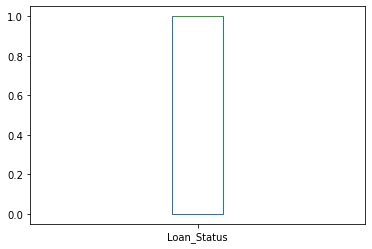

In [84]:
df1['Loan_Status'].plot.box()

The above box plots shows that which independent variables have outliers.

# Removing Outliers

In [85]:
from scipy.stats import zscore

df1zscore=np.abs(zscore(df1))
print(np.where(df1zscore>3))

(array([  9,  14,  68,  94, 126, 130, 133, 155, 155, 171, 171, 177, 177,
       183, 185, 242, 262, 278, 308, 313, 333, 333, 369, 402, 409, 417,
       432, 443, 487, 495, 497, 506, 523, 525, 546, 561, 575, 581, 585,
       600, 604], dtype=int64), array([7, 9, 9, 9, 6, 8, 9, 6, 8, 6, 8, 7, 8, 6, 6, 9, 9, 8, 8, 9, 6, 8,
       8, 7, 6, 7, 8, 6, 8, 9, 9, 8, 8, 8, 9, 8, 9, 7, 9, 7, 8],
      dtype=int64))


In [86]:
df1new=df1[(df1zscore<3).all(axis=1)]
print('df1new.shape=',df1new.shape)

df1=df1new

df1new.shape= (577, 13)


In [87]:
df1

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,0,1,0,0,0,0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,1,0,0,4583,1508.0,128.000000,360.0,1.0,0,0
2,2,1,1,0,0,1,3000,0.0,66.000000,360.0,1.0,2,1
3,3,1,1,0,1,0,2583,2358.0,120.000000,360.0,1.0,2,1
4,4,1,0,0,0,0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,609,0,0,0,0,0,2900,0.0,71.000000,360.0,1.0,0,1
610,610,1,1,3,0,0,4106,0.0,40.000000,180.0,1.0,0,1
611,611,1,1,1,0,0,8072,240.0,253.000000,360.0,1.0,2,1
612,612,1,1,2,0,0,7583,0.0,187.000000,360.0,1.0,2,1


In [88]:
# dataloss

dataloss=(614-577)/614*100
dataloss

6.026058631921824

# Skewness

In [89]:
df1.skew()

Loan_ID              0.010879
Gender              -1.622920
Married             -0.630211
Dependents           1.052106
Education            1.306588
Self_Employed        2.252848
ApplicantIncome      2.148522
CoapplicantIncome    1.350517
LoanAmount           1.113132
Loan_Amount_Term    -2.077031
Credit_History      -1.976043
Property_Area       -0.055332
Loan_Status         -0.822635
dtype: float64

# Splitting dataset into two parts: Input and Target Variable

In [102]:
#Dropping Loan_ID because it's unique in each row, If we drop it, it'll not reflect to our prediction
df1.drop('Loan_ID',axis=1,inplace=True)

In [103]:
df1

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,1,0,0,0,0.0,5849,0.0,146.412162,360.0,1.0,2,1
1,1,1,1,0,0.0,4583,1508.0,128.000000,360.0,1.0,0,0
2,1,1,0,0,1.0,3000,0.0,66.000000,360.0,1.0,2,1
3,1,1,0,1,0.0,2583,2358.0,120.000000,360.0,1.0,2,1
4,1,0,0,0,0.0,6000,0.0,141.000000,360.0,1.0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0.0,2900,0.0,71.000000,360.0,1.0,0,1
610,1,1,3,0,0.0,4106,0.0,40.000000,180.0,1.0,0,1
611,1,1,1,0,0.0,8072,240.0,253.000000,360.0,1.0,2,1
612,1,1,2,0,0.0,7583,0.0,187.000000,360.0,1.0,2,1


In [104]:
x=df1.drop('Loan_Status', axis=1)
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,1,0,0,0,0.0,5849,0.0,146.412162,360.0,1.0,2
1,1,1,1,0,0.0,4583,1508.0,128.000000,360.0,1.0,0
2,1,1,0,0,1.0,3000,0.0,66.000000,360.0,1.0,2
3,1,1,0,1,0.0,2583,2358.0,120.000000,360.0,1.0,2
4,1,0,0,0,0.0,6000,0.0,141.000000,360.0,1.0,2
...,...,...,...,...,...,...,...,...,...,...,...
609,0,0,0,0,0.0,2900,0.0,71.000000,360.0,1.0,0
610,1,1,3,0,0.0,4106,0.0,40.000000,180.0,1.0,0
611,1,1,1,0,0.0,8072,240.0,253.000000,360.0,1.0,2
612,1,1,2,0,0.0,7583,0.0,187.000000,360.0,1.0,2


In [105]:
y=df1['Loan_Status']
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 577, dtype: int32

# SMOTE

# !pip install imblearn -- user

pip install imblearn

In [94]:
from imblearn.over_sampling import SMOTE

In [106]:
y

0      1
1      0
2      1
3      1
4      1
      ..
609    1
610    1
611    1
612    1
613    0
Name: Loan_Status, Length: 577, dtype: int32

In [107]:
y.value_counts()

1    398
0    179
Name: Loan_Status, dtype: int64

In [108]:
oversample = SMOTE()
x, y = oversample.fit_resample(x, y)

In [109]:
y.value_counts()

1    398
0    398
Name: Loan_Status, dtype: int64

Now we are managed dataset imbalance using SMOTE technique.

# Scaling

In [110]:
scaler = StandardScaler()
x = pd.DataFrame(scaler.fit_transform(x), columns=x.columns)

In [111]:
x

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,0.559939,-1.140429,-0.677183,-0.483848,-0.386172,0.424688,-0.851272,0.196102,0.248258,0.581908,1.372566
1,0.559939,0.876863,0.407400,-0.483848,-0.386172,-0.015005,0.084589,-0.142936,0.248258,0.581908,-1.192135
2,0.559939,0.876863,-0.677183,-0.483848,2.837249,-0.564795,-0.851272,-1.284593,0.248258,0.581908,1.372566
3,0.559939,0.876863,-0.677183,2.066766,-0.386172,-0.709623,0.612097,-0.290246,0.248258,0.581908,1.372566
4,0.559939,-1.140429,-0.677183,-0.483848,-0.386172,0.477132,-0.851272,0.096444,0.248258,0.581908,1.372566
...,...,...,...,...,...,...,...,...,...,...,...
791,0.559939,0.876863,-0.677183,-0.483848,-0.386172,1.310674,-0.851272,0.704166,0.248258,0.222612,0.090216
792,-1.785910,-1.140429,-0.677183,-0.483848,-0.386172,0.215956,0.617233,0.474107,1.556056,0.581908,-1.192135
793,-1.785910,-1.140429,-0.677183,-0.483848,-0.386172,-0.769013,-0.851272,-1.328108,0.248258,0.581908,0.090216
794,0.559939,-1.140429,-0.677183,-0.483848,-0.386172,-0.533190,-0.851272,-1.179929,2.044435,0.581908,1.372566


# Finding Best Random State

In [112]:
maxAccu=0
maxRS=0
for i in range(1400,1450):
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=i)
    LR = LogisticRegression()
    LR.fit(x_train,y_train)
    predrf = LR.predict(x_test)
    acc = accuracy_score(y_test, predrf)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print("Best accuracy is",maxAccu," on Random_state ",maxRS)

Best accuracy is 0.8284518828451883  on Random_state  1442


# Creating train_test_split

In [113]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=.30,random_state=maxRS)

In [114]:
x_train.shape

(557, 11)

In [115]:
y_train.shape

(557,)

In [116]:
x_test.shape

(239, 11)

In [117]:
y_test.shape

(239,)

# Finding Best Model

In [120]:
model=[LogisticRegression(),KNeighborsClassifier(),SVC(),DecisionTreeClassifier(),RandomForestClassifier()]

In [121]:
for m in model:
    m.fit(x_train,y_train)
    pred=m.predict(x_test)
    print("*******************************************************************************")
    print('accuracy score of ->', m)
    print(accuracy_score(y_test,pred))
    print(confusion_matrix(y_test,pred))
    print(classification_report(y_test,pred))
    score=cross_val_score(m,x,y,cv=5)
    print(score)
    print(score.mean())
    print("Difference between Accuracy score and cross validatio score is - ",accuracy_score(y_test,pred)-score.mean())
    print("*******************************************************************************")

*******************************************************************************
accuracy score of -> LogisticRegression()
0.8284518828451883
[[ 90  30]
 [ 11 108]]
              precision    recall  f1-score   support

           0       0.89      0.75      0.81       120
           1       0.78      0.91      0.84       119

    accuracy                           0.83       239
   macro avg       0.84      0.83      0.83       239
weighted avg       0.84      0.83      0.83       239

[0.6875     0.72955975 0.79874214 0.83018868 0.8427673 ]
0.7777515723270441
Difference between Accuracy score and cross validatio score is -  0.050700310518144276
*******************************************************************************
*******************************************************************************
accuracy score of -> KNeighborsClassifier()
0.7782426778242678
[[ 86  34]
 [ 19 100]]
              precision    recall  f1-score   support

           0       0.82      0.72      0.76  

Random Forest Classifier have highest Accuracy and Cross Validation Score is also good 82%.

# Hyper Parameter Tuning

In [129]:
RandomForestClassifier()

RandomForestClassifier()

In [130]:
from sklearn.model_selection import GridSearchCV

parameters={'max_features':['auto','sqrt','log2'],
           'max_depth':[4,5,6,7,8],
           'criterion':['gini','entropy'],
           'n_estimators':[100,200,300,400,500]}

In [131]:
GCV=GridSearchCV(estimator=RandomForestClassifier(),
                param_grid=parameters,
                cv=5,
                scoring='accuracy')

In [132]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'n_estimators': [100, 200, 300, 400, 500]},
             scoring='accuracy')

In [133]:
GCV.best_params_

{'criterion': 'gini',
 'max_depth': 5,
 'max_features': 'log2',
 'n_estimators': 200}

In [134]:
type(GCV)

sklearn.model_selection._search.GridSearchCV

In [135]:
RandomForestClassifier()

RandomForestClassifier()

In [136]:
GCV.best_estimator_

RandomForestClassifier(max_depth=5, max_features='log2', n_estimators=200)

In [137]:
GCV_pred=GCV.best_estimator_.predict(x_test)
accuracy_score(y_test,GCV_pred)

0.8075313807531381

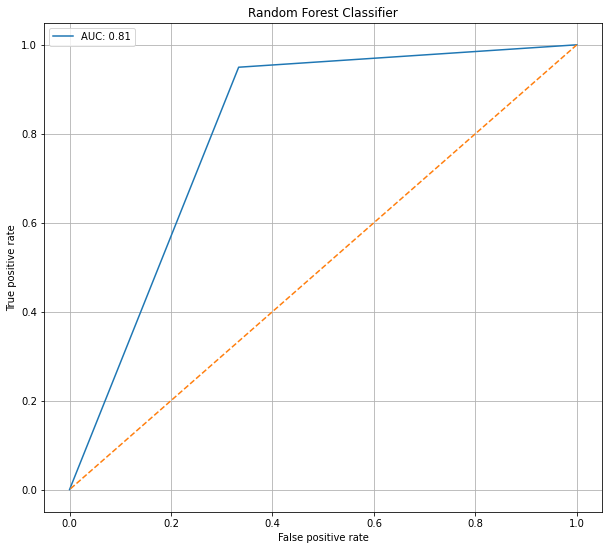

In [141]:
from sklearn.metrics import roc_curve,auc
import matplotlib.pyplot as plt
fpr,tpr,thresholds=roc_curve(y_test,GCV_pred) # calculating fpr, tpr
rf_auc = auc(fpr, tpr) #Model Accuracy
plt.figure(figsize=(10,9)) #plotting the figure, size of 10*9
plt.plot(fpr, tpr, label = 'AUC: %0.2f' % rf_auc)
plt.plot([1,0],[1,0], linestyle = '--')
plt.legend(loc=0) #adding accuracy score at bottom right
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Random Forest Classifier')
plt.grid() #adding the grid

# Saving the Final Model

In [139]:
import joblib

joblib.dump(GCV.best_estimator_,'loanmodel.obj')

loan_loadmodel=joblib.load('loanmodel.obj')
loan_loadmodel.predict(x_test)

array([1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [142]:
conclusion=pd.DataFrame([loan_loadmodel.predict(x_test)[:],predrf[:]],index=['Predicted','Original'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,229,230,231,232,233,234,235,236,237,238
Predicted,1,1,0,1,1,1,1,0,1,0,...,1,0,1,1,1,1,1,1,1,1
Original,1,1,1,0,1,0,0,1,0,0,...,0,0,1,0,1,1,1,1,1,0
